In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
wine_df = pd.read_csv('wine.csv')
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


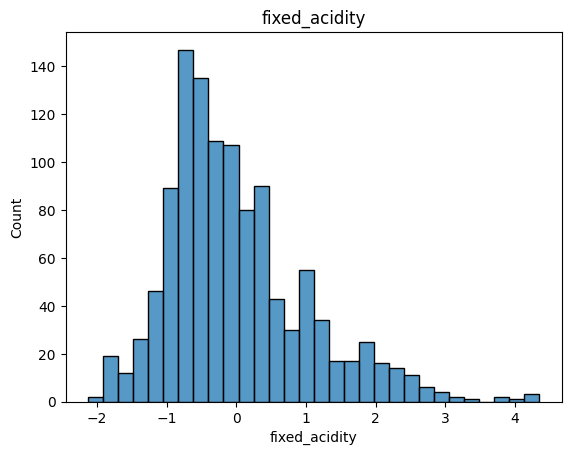

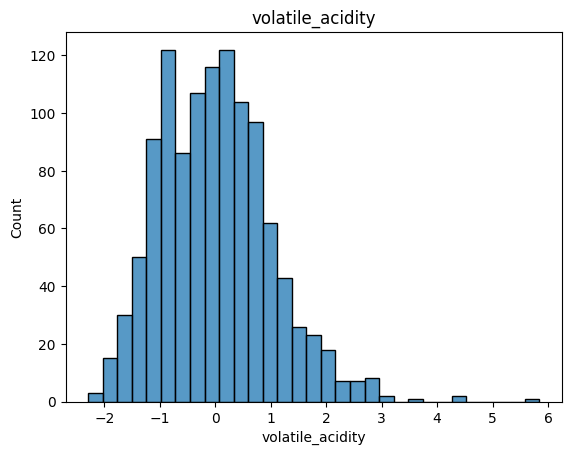

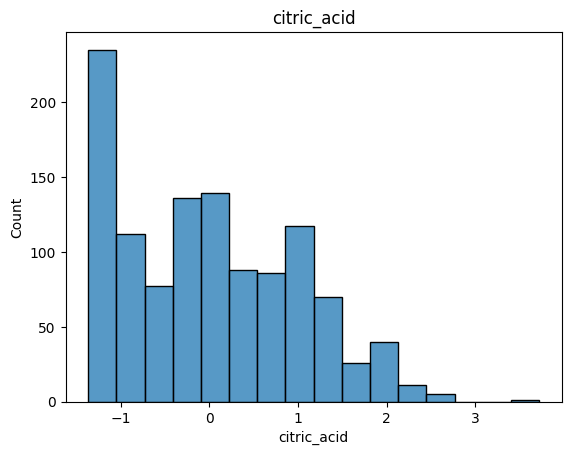

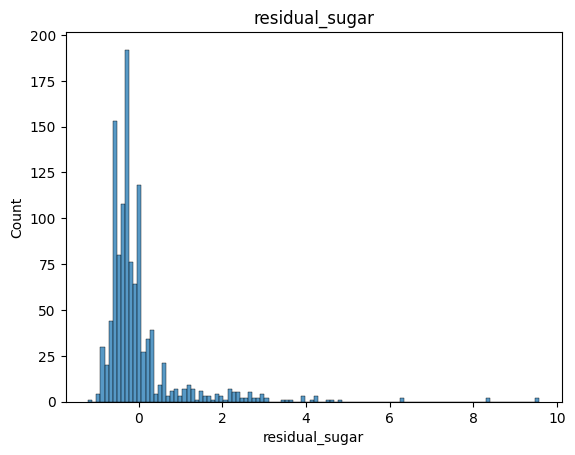

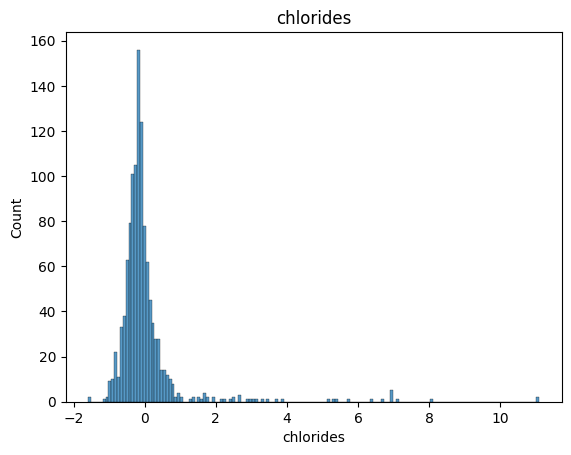

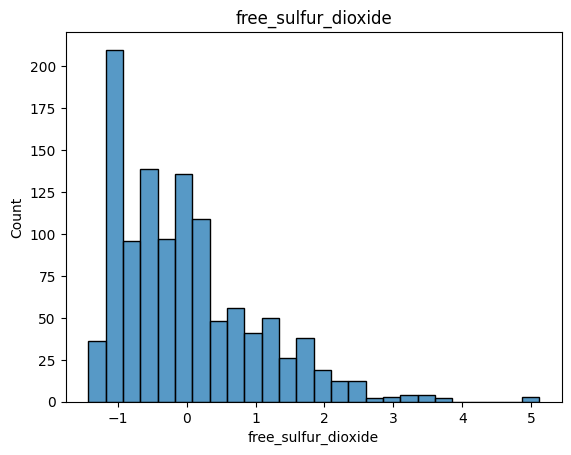

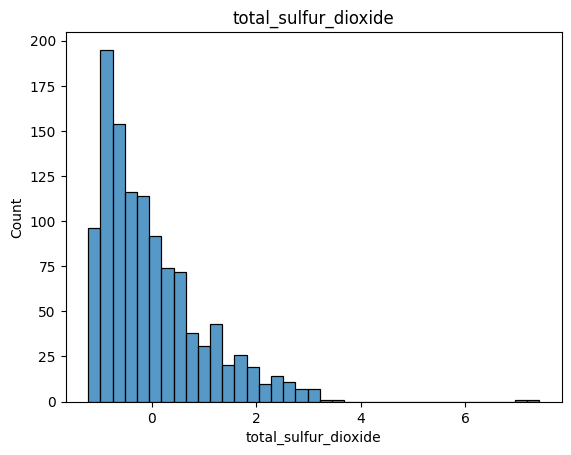

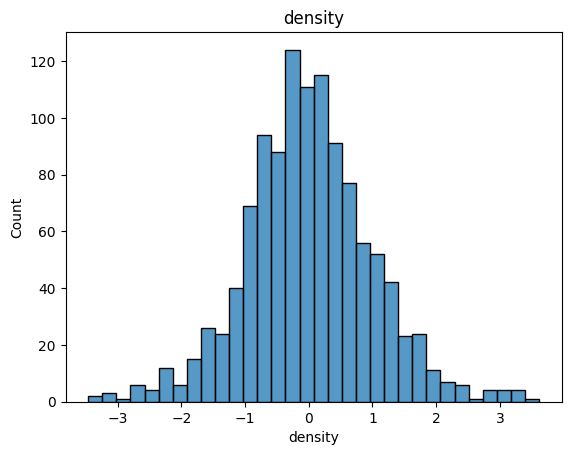

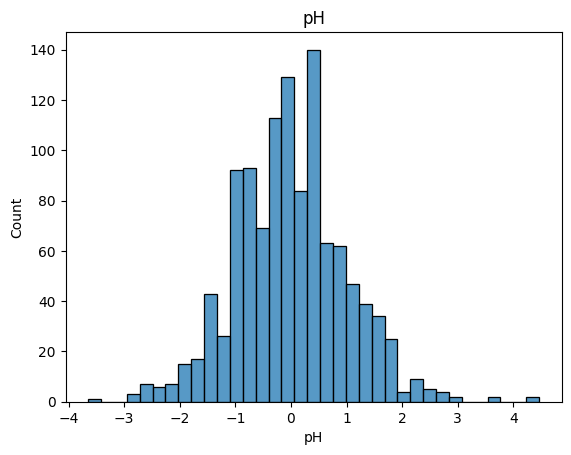

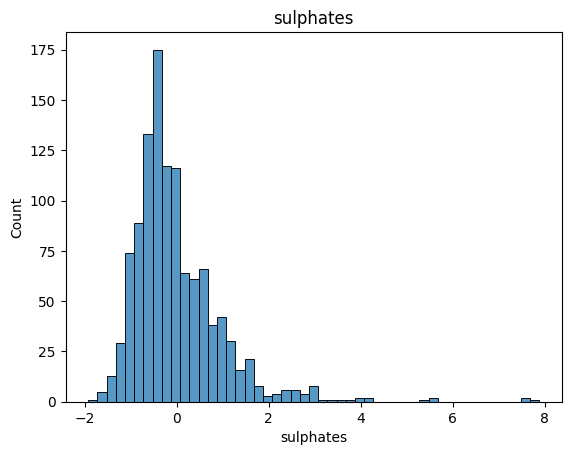

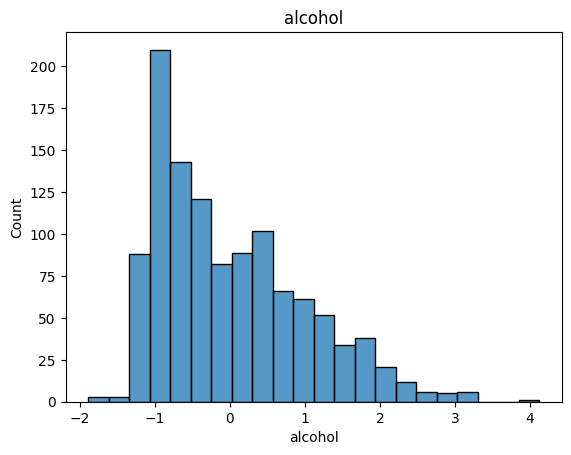

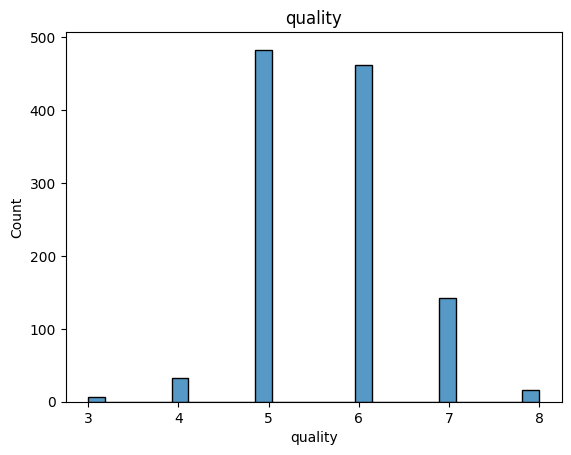

In [34]:
normal_df = pd.DataFrame()
for col in wine_df.columns:
    if col != 'quality':
        normal_df[col] = (wine_df[col] - np.mean(wine_df[col])) / np.std(wine_df[col])
        sns.histplot(normal_df[col]).set_title(col)
        plt.show()
    else:
        normal_df[col] = wine_df[col]
        sns.histplot(wine_df[col]).set_title(col)
        plt.show()

Apenas pH, densidade e qualidade são aproximadamente normais, as demais são assimétricas.

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000876         -0.250948     0.673747   
volatile_acidity          -0.250948          1.000876    -0.544663   
citric_acid                0.673747         -0.544663     1.000876   
residual_sugar             0.171981         -0.005756     0.175969   
chlorides                  0.107983          0.056386     0.245527   
free_sulfur_dioxide       -0.164975         -0.001964    -0.057640   
total_sulfur_dioxide      -0.110725          0.077816     0.036903   
density                    0.682098          0.016526     0.375572   
pH                        -0.685763          0.221685    -0.546818   
sulphates                  0.174745         -0.276320     0.331522   
alcohol                   -0.075121         -0.204088     0.106343   
quality                    0.098329         -0.328431     0.194144   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

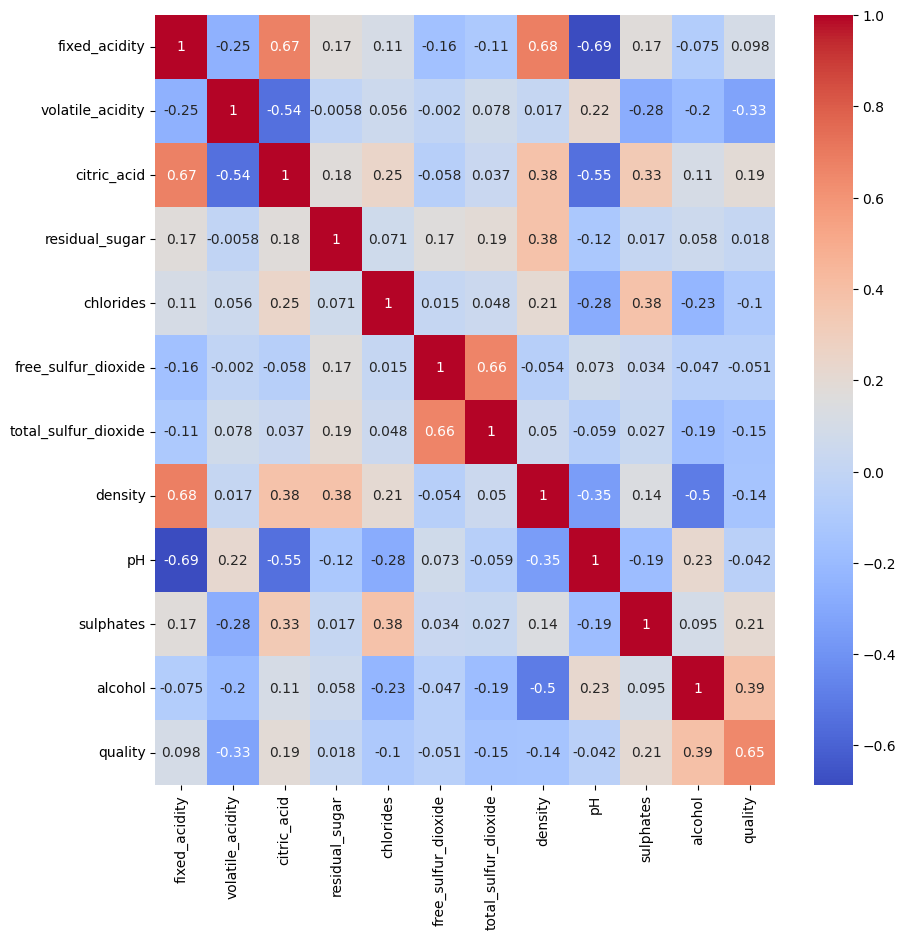

In [35]:
cov_matrix = normal_df.cov()
print(cov_matrix)
plt.figure(figsize=(10, 10))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm')
plt.show()

Não há grande covariância entre as variáveis, exceto entre acidez fixa e ácido cítrico e entre dióxido de enxofre livre e total (por motivos óbvios).

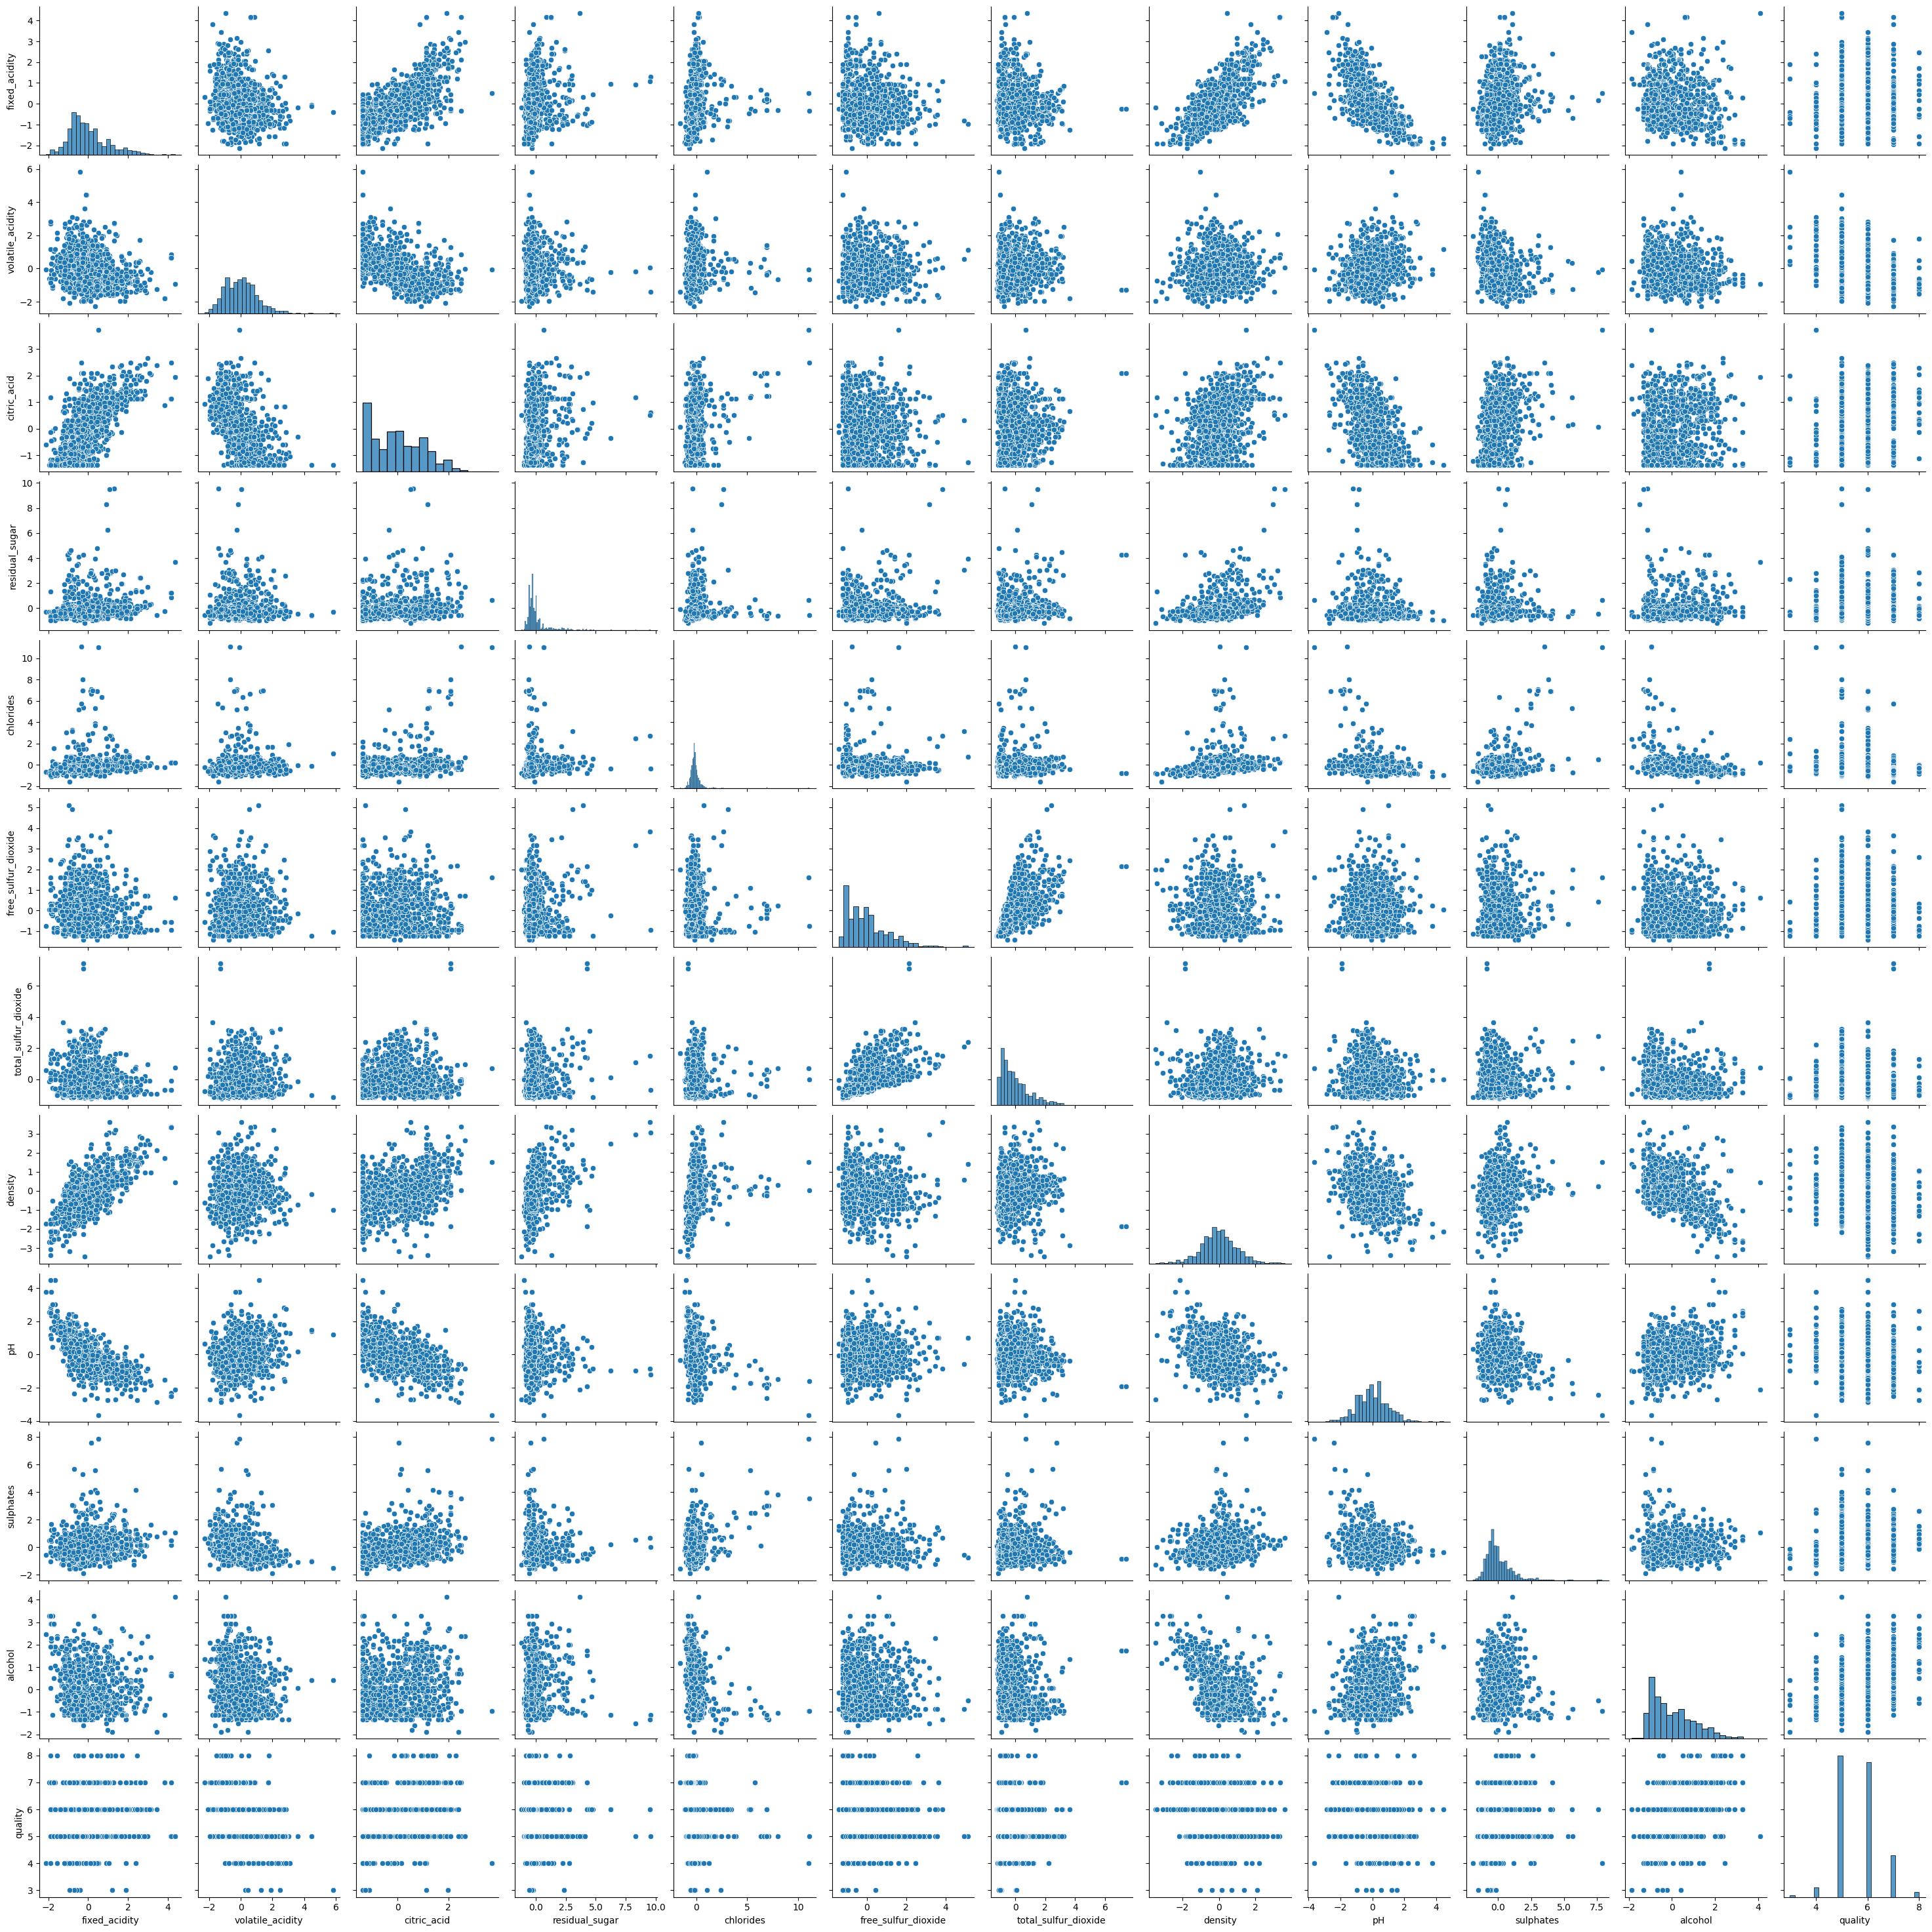

In [36]:
sns.pairplot(normal_df)

Parece não haver multicolinearidade entre as variáveis.

In [37]:
normal_df.to_csv('normal_wine.csv', index=False)